In [1]:
#필요 모듈 import
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [2]:
#가위 이미지 resize
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path) #실제 이미지 바꾸기

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
#바위 데이터 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [4]:
#보 데이터 resize
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels



image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 3) #reshape


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))



학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


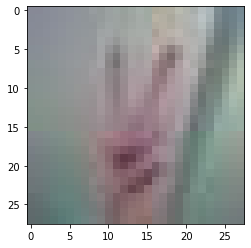

In [6]:
#import matplotlib.pyplot as plt 해줘야 들어감. PIL이랑은 별개
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [34]:
#여기서부터 모델

# 모델 필요 모듈 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32 # 필터갯수 16개
n_channel_2=32 # 필터갯수 32개
n_channel_3=32 # 필터갯수 32개
n_dense= 300 #밀도함수, flatten한 값을 output값으로 산출하기 전 복잡성 추가 
n_train_epoch=30 #학습 횟수

model=keras.models.Sequential()

model.add(keras.layers.Conv2D(n_channel_1, (3, 3), 
                              activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(n_channel_3, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_dense, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

# test data 받아오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path) #실제 이미지 바꾸기(test)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path) #실제 이미지 바꾸기(test)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path) #실제 이미지 바꾸기(test)

image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path_test)

#test data 정규화 +reshape
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path_test)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 3) #reshape

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=13)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 32)              

In [30]:
#회고

# 정확도 올리기 위해 한 일

# 1. hyperparameter 조작 -> , 필터갯수, 에폭치 조정
# dense layer 조작 : dense 층을 하나 더 만들고 파라미터 갯수를 100으로 늘림 -> 10%상승
# 필터크기 조작 : 3x3 -> 6x6 : 유의미한 결과 없음
# 에폭 10->100으로 변경 : 유의미한 결과 없음
# 

# 2. 레이어 추가
# 추상도를 높이기 위한 더 높은 abstract feature 추출을 위해 layer를 한층 더 추가함(cov, maxpool layer) 
# convolution layer + maxpool layer를 지난 이미지는 특징값만이 추출된 추상적 이미지로 변환된다고 한다
# 이 추상도를 더 높여서 더 다양한 데이터셋, 즉 테스트 데이터 셋을 더 잘 인식할 수 있게 하려고 했다.

# 의문점 : 레이어를 한 층 더 추가했더니 오류가 발생해 다시 제거했다
# <오류 코드> 
# ValueError: Negative dimension size caused by subtracting 3 from  
# 1 for'{{node conv2d_245/Conv2D}} = Conv2D[T=DT_FLOAT~
# 풀링을 반복해 데이터 사이즈가 달라져 오류가 뜬 것으로 보여 다시 제거했다.

#3. 정규화된 데이터 쓰기 + reshape
#처음에 학습시킬때, 정규화한 데이터가 아닌 기종 데이터를 썼다는 것을 
# 깨달았다. 정규화된 데이터로 학습, 시험 데이터를 바꿔줬다.
# 정확도가 30->50%로 증가했다.

# 최고치 : test_accuracy: 0.5400000214576721

# 리뷰
# 정확도가 60~70%가 넘은 다른 학생들의 모델을 훑어보니, 테스트데이터를 본인이
# 직접 찍은 사진으로 하였을때 더 높은 정확도가 나왔다. 테스트 셋 데이터의 차이가
# 무엇인지를 살펴봤는데, 화질이나 정확한 손모양 등 데이터의 품질에는 별 차이가 
# 없었으나, 주로 테스트 데이터의 갯수가 아이펠에서 주어진 테스트 데이터 셋의 갯수보다
# 적은 경우가 많았다. 생각컨데, 정확도를 구하는 식이 전체 데이터 중 몇개를 제대로 인식했냐
# 로 산출되기때문에, 아무래도 적은 양의 테스트 데이터를 넣었을 때 정확도가 높게
# 나올 가능성이 높아지는 듯 하다. (필자는 아이펠 제공 학습,시험 데이터를 사용했다.)
# (이는 다른 친구의 모델과 파라미터와 구조를 동일하게 설정해 놓고 돌려보았을때도,
# 결괏값이 다르게 나와 차이를 찾던중 추론한 내용이다. 데이터의 차이 말고는 존재하지 않았다.)

# 한계점, 수학계획
# 파라미터를 바꾸며 인공지능의 성능을 개선해보는 경험을 할 수 있어 좋았지만,
# 모델 구조와 케라스 메소드들과 작동원리에 대한 이해가 뒷받침되어야 파라미터
# 조절도 잘 할 수 있겠다는 생각이 들었다. 모델에 대한 이해 없이 파라미터만
# 계속 건드리는 작업이 마치 맨 땅에 해딩하는 듯한 막막함을 안겨주었기 때문이다.
# cnn의 원론적 구조를 더 배우고, 그것이 코드로 어떻게 구현되는지를 더 알아보기로
# 결심하게 되는 계기가 되었다.